In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [14]:
def get_sb_moffat(r, alpha, beta):
    """
    Calculate the surface brightness of light at radius r of a Moffat profile.
    The integral (i.e., total flux) is unity by definition.
    """
    i = (beta-1)/(np.pi * alpha**2)*(1 + (r/alpha)**2)**(-beta)
    return i

In [3]:
cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/dr10dev/misc/survey-ccds-dr10-v4-psfex-fwhm.fits'))
print(len(cat))
dr9 = Table(fitsio.read('/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/survey-ccds-decam-dr9.fits.gz', columns=['expnum', 'ccdname', 'ccd_cuts', 'filter']))
print(len(dr9))

cat['ccd_id_str'] = np.char.add(np.array(cat['expnum']).astype(str), cat['ccdname'])
dr9['ccd_id_str'] = np.char.add(np.array(dr9['expnum']).astype(str), dr9['ccdname'])

mask = dr9['ccd_cuts']==0
dr9 = dr9[mask]
print(len(dr9))

cat = join(cat, dr9[['ccd_id_str', 'filter']], keys='ccd_id_str', join_type='inner')
print(len(cat))

ccd = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/useful/survey-ccds-decam-dr9-trim.fits'))
cat = join(cat, ccd[['expnum', 'image_filename']])

cat_all = cat.copy()

15523579
6388340
4891222
4891222


In [4]:
tmp = Table()
tmp['filter'], tmp['count'] = np.unique(cat['filter'], return_counts=True)
tmp.sort('count')
tmp

filter,count
str1,int64
r,1567932
g,1641479
z,1681811


In [174]:
np.random.seed(931)
idx = np.random.choice(len(cat_all), size=(10), replace=False)
cat = cat_all[idx].copy()

tmp = Table()
tmp['filter'], tmp['count'] = np.unique(cat['filter'], return_counts=True)
tmp.sort('count')
tmp

filter,count
str1,int64
r,2
z,3
g,5


In [175]:
cat

expnum,ccdname,psf_fwhm,median_psf_fwhm,moffat_alpha,moffat_beta,failure,ccd_id_str,filter,image_filename
int64,str3,float64,float64,float64,float64,bool,str24,str1,str120
388565,N19,5.31431484,5.321195125,0.8613286524973928,2.478288646166419,False,388565N19,g,decam/CP/V4.8.2a/CP20141216/c4d_141217_051122_ooi_g_ls9.fits.fz
362071,S7,4.56431246,4.34220934,0.7383975674330848,2.672625307103578,False,362071S7,g,decam/CP/V4.8.2a/CP20140924/c4d_140925_063443_ooi_g_ls9.fits.fz
430387,N1,4.47972727,4.27818632,0.5004617216308653,2.1037712568098335,False,430387N1,z,decam/CP/V4.8.2a/CP20150407/c4d_150408_034503_ooi_z_ls9.fits.fz
571508,S18,6.5638237,6.627610445,1.0470580222383232,2.3189399842174305,False,571508S18,r,decam/CP/V4.8.2a/CP20160905/c4d_160906_092248_ooi_r_ls9.fits.fz
707448,S27,4.03691196,4.00303555,0.4816996364917049,2.230045357979116,False,707448S27,g,decam/CP/V4.1/CP20171225/c4d_171226_043245_ooi_g_v1.fits.fz
763558,N18,4.78449631,4.82836246,0.6663170437357577,2.285562585816391,False,763558N18,r,decam/CP/V4.8.2a/CP20180809/c4d_180809_234850_ooi_r_ls9.fits.fz
586669,N13,6.80856419,6.7708056,1.0658189929861326,2.212242560965302,False,586669N13,g,decam/CP/V4.8.2/CP20161026/c4d_161027_053704_ooi_g_ls9.fits.fz
363754,S3,3.97922921,3.9789637300000003,0.4563222145597577,1.9414930245487345,False,363754S3,z,decam/CP/V4.8.2a/CP20140929/c4d_140930_013916_ooi_z_ls9.fits.fz
625381,N27,4.84281921,4.885427,0.8214465275745906,2.649502981734073,False,625381N27,g,decam/CP/V4.8.2/CP20170302/c4d_170303_055515_ooi_g_ls9.fits.fz


decam/CP/V4.8.2a/CP20141216/c4d_141217_051122_ooi_g_ls9-psfex.fits
Sum:  0.999 1.014
FWHM: 5.528 5.268


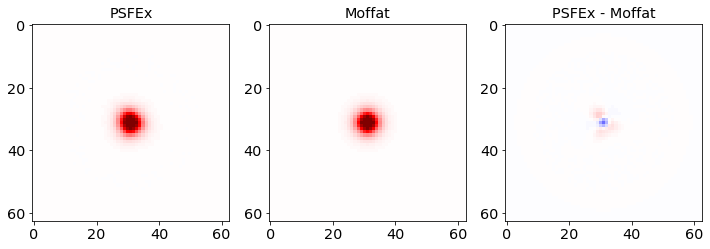

decam/CP/V4.8.2a/CP20140924/c4d_140925_063443_ooi_g_ls9-psfex.fits
Sum:  1.000 1.008
FWHM: 4.665 4.212


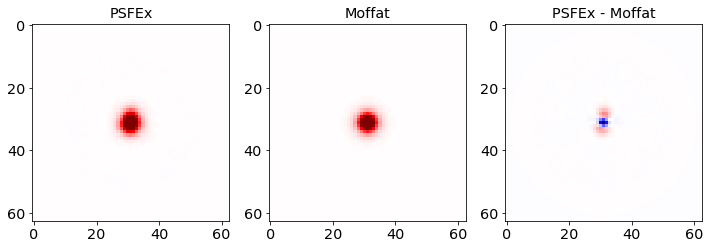

decam/CP/V4.8.2a/CP20150407/c4d_150408_034503_ooi_z_ls9-psfex.fits
Sum:  0.998 1.013
FWHM: 4.636 3.746


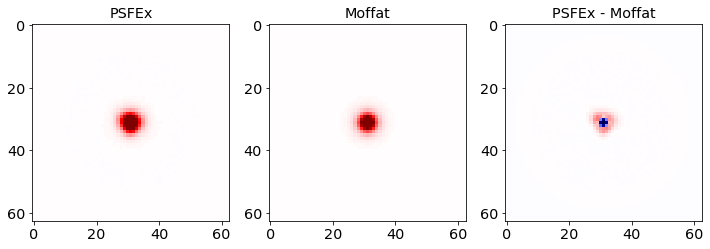

decam/CP/V4.8.2a/CP20160905/c4d_160906_092248_ooi_r_ls9-psfex.fits
Sum:  0.997 1.036
FWHM: 6.941 6.834


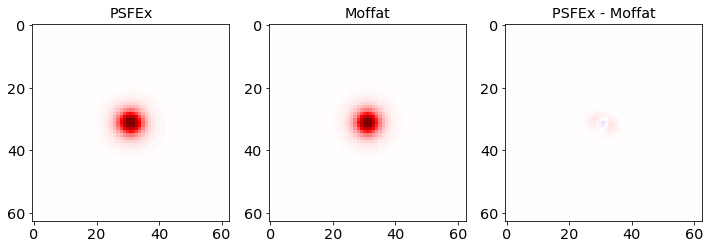

decam/CP/V4.1/CP20171225/c4d_171226_043245_ooi_g_v1-psfex.fits
Sum:  0.999 1.008
FWHM: 4.079 3.378


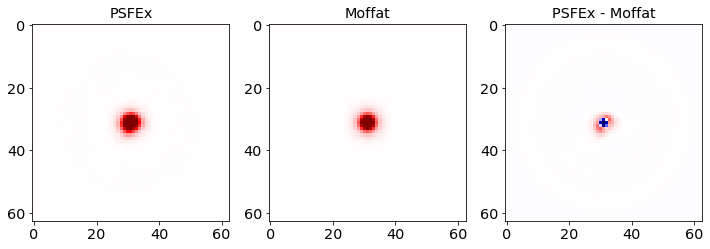

decam/CP/V4.8.2a/CP20180809/c4d_180809_234850_ooi_r_ls9-psfex.fits
Sum:  0.999 1.015
FWHM: 5.046 4.477


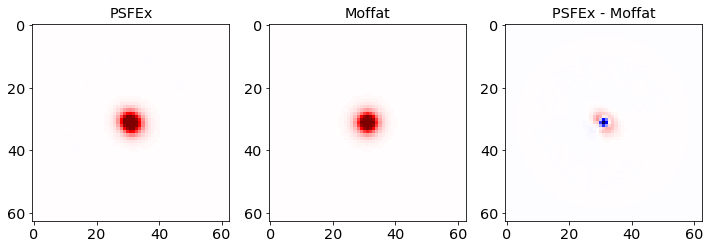

decam/CP/V4.8.2/CP20161026/c4d_161027_053704_ooi_g_ls9-psfex.fits
Sum:  0.995 1.048
FWHM: 7.274 7.322


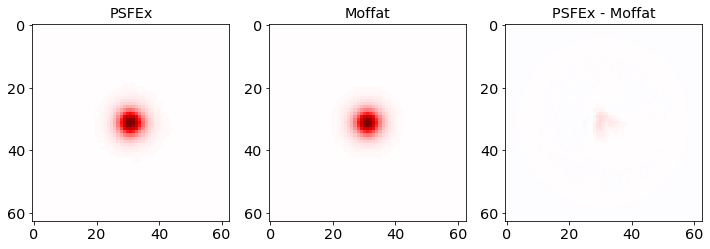

decam/CP/V4.8.2a/CP20140929/c4d_140930_013916_ooi_z_ls9-psfex.fits
Sum:  0.996 1.023
FWHM: 4.196 3.794


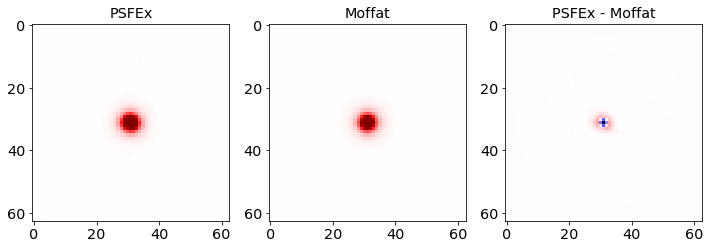

decam/CP/V4.8.2/CP20170302/c4d_170303_055515_ooi_g_ls9-psfex.fits
Sum:  1.000 1.012
FWHM: 4.974 4.708


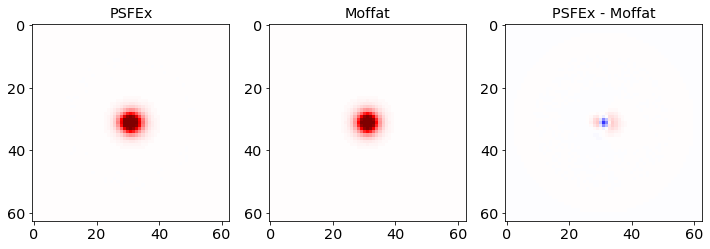

decam/CP/V4.8.2a/CP20151130/c4d_151201_045004_ooi_z_ls9-psfex.fits
Sum:  0.995 1.024
FWHM: 4.609 4.063


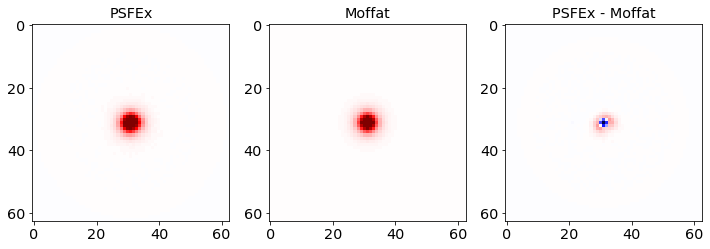

In [190]:
for index in range(len(cat)):

    image_filename = cat['image_filename'][index]
    psfex_filename = image_filename[:image_filename.find('.fits.fz')]+'-psfex.fits'
    print(psfex_filename)
    psfex_path = os.path.join('/global/cfs/projectdirs/cosmo/work/legacysurvey/dr9/calib/psfex', psfex_filename)
    psfex = Table(fitsio.read(psfex_path))
    ii = np.where(psfex['ccdname']==cat['ccdname'][index])[0][0]
    psfex_img = np.array(psfex['psf_mask'][ii][0])
    psfex_nea = np.sum(psfex_img)**2/np.sum(psfex_img**2)
    psfex_fwhm = np.sqrt(psfex_nea / (4 * np.pi)) * 2.3548  # FWHM a la tractor

    img_size = 31
    pixscale = 0.262

    subpix_factor = 11
    x = pixscale * (np.arange(-img_size-0.5, img_size+0.5, 1/subpix_factor) + 1/subpix_factor/2)
    y = pixscale * (np.arange(-img_size-0.5, img_size+0.5, 1/subpix_factor) + 1/subpix_factor/2)
    xx, yy = np.meshgrid(x, y)
    rr = np.sqrt(xx**2+yy**2)

    alpha, beta = cat['moffat_alpha'][index], cat['moffat_beta'][index]
    moffat_img = pixscale**2 * get_sb_moffat(rr, alpha, beta)
    moffat_img = np.mean(np.mean(moffat_img.reshape((moffat_img.shape[0]//subpix_factor, subpix_factor, moffat_img.shape[1]//subpix_factor,-1)), axis=3), axis=1)
    print('Sum:  {:.3f} {:.3f}'.format(np.sum(moffat_img), np.sum(psfex_img)))
    moffat_nea = np.sum(moffat_img)**2/np.sum(moffat_img**2)
    moffat_fwhm = np.sqrt(moffat_nea / (4 * np.pi)) * 2.3548  # FWHM a la tractor
    print('FWHM: {:.3f} {:.3f}'.format(psfex_fwhm, moffat_fwhm))

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(psfex_img, vmin=-0.02, vmax=0.02, cmap='seismic')
    ax[0].set_title('PSFEx')
    ax[1].imshow(moffat_img, vmin=-0.02, vmax=0.02, cmap='seismic')
    ax[1].set_title('Moffat')
    ax[2].imshow(psfex_img - moffat_img, vmin=-0.02, vmax=0.02, cmap='seismic')
    ax[2].set_title('PSFEx - Moffat')
    plt.show()

decam/CP/V4.8.2a/CP20141216/c4d_141217_051122_ooi_g_ls9-psfex.fits
Sum:  0.999 1.014
FWHM: 5.528 5.268


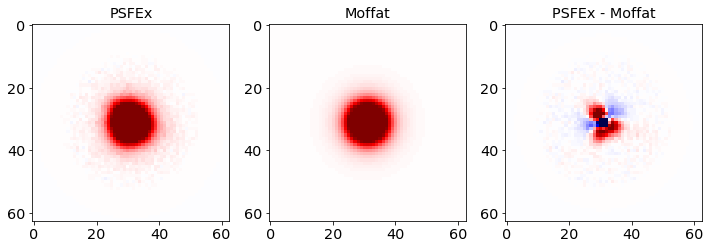

decam/CP/V4.8.2a/CP20140924/c4d_140925_063443_ooi_g_ls9-psfex.fits
Sum:  1.000 1.008
FWHM: 4.665 4.212


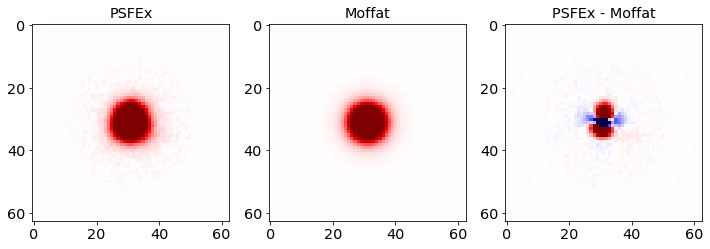

decam/CP/V4.8.2a/CP20150407/c4d_150408_034503_ooi_z_ls9-psfex.fits
Sum:  0.998 1.013
FWHM: 4.636 3.746


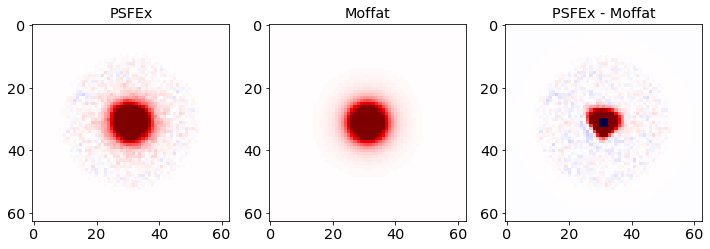

decam/CP/V4.8.2a/CP20160905/c4d_160906_092248_ooi_r_ls9-psfex.fits
Sum:  0.997 1.036
FWHM: 6.941 6.834


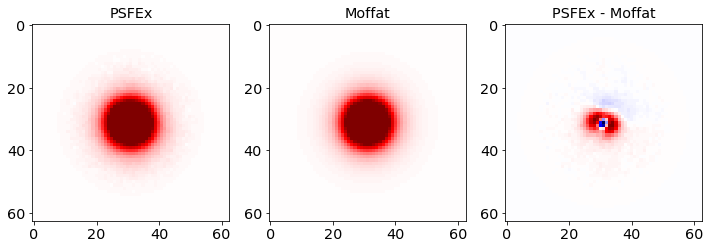

decam/CP/V4.1/CP20171225/c4d_171226_043245_ooi_g_v1-psfex.fits
Sum:  0.999 1.008
FWHM: 4.079 3.378


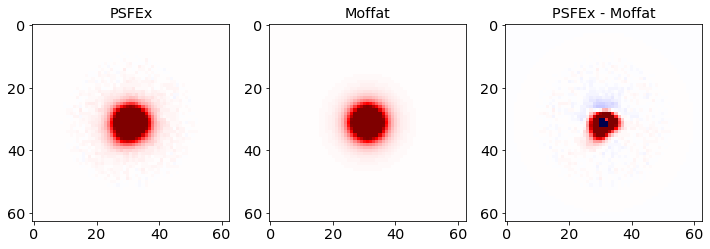

decam/CP/V4.8.2a/CP20180809/c4d_180809_234850_ooi_r_ls9-psfex.fits
Sum:  0.999 1.015
FWHM: 5.046 4.477


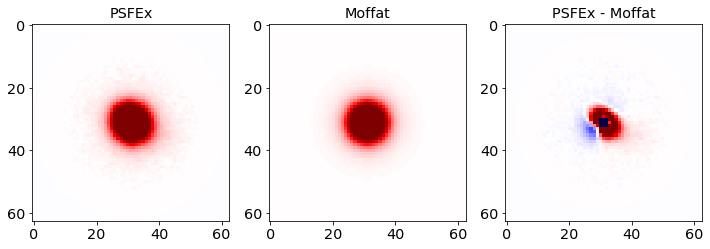

decam/CP/V4.8.2/CP20161026/c4d_161027_053704_ooi_g_ls9-psfex.fits
Sum:  0.995 1.048
FWHM: 7.274 7.322


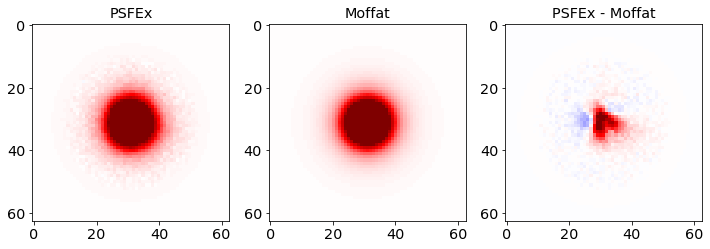

decam/CP/V4.8.2a/CP20140929/c4d_140930_013916_ooi_z_ls9-psfex.fits
Sum:  0.996 1.023
FWHM: 4.196 3.794


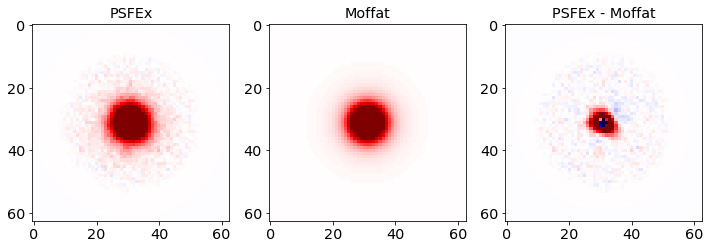

decam/CP/V4.8.2/CP20170302/c4d_170303_055515_ooi_g_ls9-psfex.fits
Sum:  1.000 1.012
FWHM: 4.974 4.708


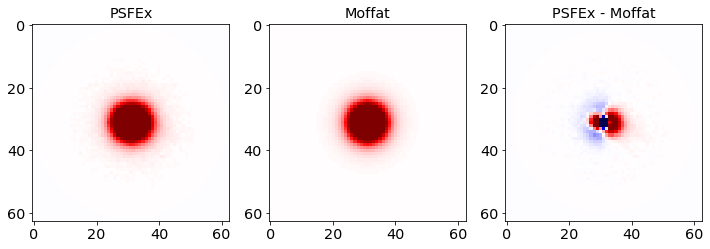

decam/CP/V4.8.2a/CP20151130/c4d_151201_045004_ooi_z_ls9-psfex.fits
Sum:  0.995 1.024
FWHM: 4.609 4.063


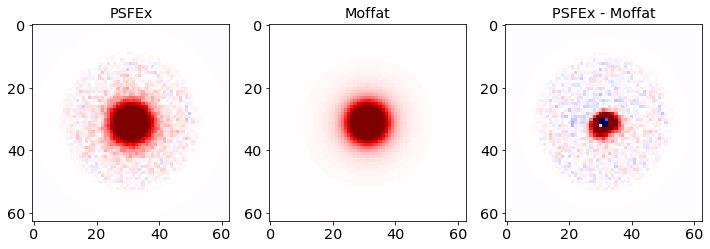

In [189]:
# Adjust contrast

for index in range(len(cat)):

    image_filename = cat['image_filename'][index]
    psfex_filename = image_filename[:image_filename.find('.fits.fz')]+'-psfex.fits'
    print(psfex_filename)
    psfex_path = os.path.join('/global/cfs/projectdirs/cosmo/work/legacysurvey/dr9/calib/psfex', psfex_filename)
    psfex = Table(fitsio.read(psfex_path))
    ii = np.where(psfex['ccdname']==cat['ccdname'][index])[0][0]
    psfex_img = np.array(psfex['psf_mask'][ii][0])
    psfex_nea = np.sum(psfex_img)**2/np.sum(psfex_img**2)
    psfex_fwhm = np.sqrt(psfex_nea / (4 * np.pi)) * 2.3548  # FWHM a la tractor

    img_size = 31
    pixscale = 0.262

    subpix_factor = 11
    x = pixscale * (np.arange(-img_size-0.5, img_size+0.5, 1/subpix_factor) + 1/subpix_factor/2)
    y = pixscale * (np.arange(-img_size-0.5, img_size+0.5, 1/subpix_factor) + 1/subpix_factor/2)
    xx, yy = np.meshgrid(x, y)
    rr = np.sqrt(xx**2+yy**2)

    alpha, beta = cat['moffat_alpha'][index], cat['moffat_beta'][index]
    moffat_img = pixscale**2 * get_sb_moffat(rr, alpha, beta)
    moffat_img = np.mean(np.mean(moffat_img.reshape((moffat_img.shape[0]//subpix_factor, subpix_factor, moffat_img.shape[1]//subpix_factor,-1)), axis=3), axis=1)
    print('Sum:  {:.3f} {:.3f}'.format(np.sum(moffat_img), np.sum(psfex_img)))
    moffat_nea = np.sum(moffat_img)**2/np.sum(moffat_img**2)
    moffat_fwhm = np.sqrt(moffat_nea / (4 * np.pi)) * 2.3548  # FWHM a la tractor
    print('FWHM: {:.3f} {:.3f}'.format(psfex_fwhm, moffat_fwhm))

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(psfex_img, vmin=-0.001, vmax=0.001, cmap='seismic')
    ax[0].set_title('PSFEx')
    ax[1].imshow(moffat_img, vmin=-0.001, vmax=0.001, cmap='seismic')
    ax[1].set_title('Moffat')
    ax[2].imshow(psfex_img - moffat_img, vmin=-0.001, vmax=0.001, cmap='seismic')
    ax[2].set_title('PSFEx - Moffat')
    plt.show()